# Lab 6

**Partners:
Radhika Mardikar, Xinxin Mo**

## Step 1: Open up a terminal on bioe131.com and locate the data


The directory of data:

(1) The reads from sequencing run are at: **/data/lab6/illumina_reads.fastq**

(2) A bowtie2 database containing the human genome is at: **/data/hg19/hg19**

(3) A bowtie2 database containing the S. oneidensis MR-1 reference genome is at: **/data/lab6/shewanella_oneidensis_mr-1**


## Step 2: Align the reads to the human genome

//
First we got the data from the server on terminal and used the bowtie2 command line given on the lab powerpoint to first align the sequencing reads to the human genome and clean up whatever doesn't fit. For the database, we used the provided human genome sequence and the S. oneidensis sequence and aligned it to the input file which is the results of the sequencing (the reads). The final cleaned up sequence will be put into a SAM file. We are choosing not to include an unaligned.fa file, but it would include those bases that don't align with the genome.
//

First we map the readed to the human genome first to remove any contamination. For the **database**, we used the provided human genome sequence database. For the **input** sequence (the reads), we used the reads named "illumina_reads.fastq". We used the bowtie2 command line given on the lab powerpoint to first align the sequencing reads to the human genome and clean up whatever doesn't fit. 

When aligning to the human genome, the input we use is "illumina_reads.fastq". Then, we put into the terminal:
```sh
bowtie2 --very-fast --no-unal -x /data/hg19/hg19 \
-U /data/lab6/illumina_reads.fastq \
-S /home/be131-03/lab6/bio131test/lab6/output_human.sam \
--un /home/be131-03/lab6/bio131test/lab6/unaligned_human.fastq
```
         
Our output was:

```
1124714 reads; of these:
1124714 (100.00%) were unpaired; of these:
1028379 (91.43%) aligned 0 times
87274 (7.76%) aligned exactly 1 time
9061 (0.81%) aligned >1 times
8.57% overall alignment rate
```


- Question: What will you use for the database? Input reads?

    Answer:  For the database, we used the provided human genome sequence database. For the input sequence (the reads), we used the reads named "illumina_reads.fastq". 


- Question: If you use the --un unaligned.fastq option, what will unaligned.fastq contain?

    Answer: The final cleaned up sequence will be put into a SAM file. The sequence that cannot be aligned to human genome database would be placed to the unaligned.fastq file.


- Question: What percentage of your sequencing library came from contaminating human DNA?

    Answer: We got an 8.57% alignment rate for the human genome, we can conclude that the rest of the results (around or less than 91.43%) should align to the bacteria genome. 



## Step 3: Align the reads to the S. oneidensis reference genome

In this part, we align the reads to S. oneidensis genome. We utilized two different reads as input, namely the original reads ("illumina_reads.fastq") and the filtered reads we obtained in the previous step ("unaligned_human.fastq").

### Step 3.1:  Align the "illumina_reads.fastq" to the S. oneidensis reference genome

When aligning to the bacteria genome, we first use "illumina_reads.fastq" as the input. First, we tried **--very-fast**, so we put the command lines into the terminal as follow:

```sh
bowtie2 --very-fast --no-unal -x /data/lab6/shewanella_oneidensis_mr-1 \
-U /data/lab6/illumina_reads.fastq \
-S /home/be131-03/lab6/bio131test/lab6/output.sam
```

Our output was: 

```
1124714 reads; of these:
1124714 (100.00%) were unpaired; of these:
395895 (35.20%) aligned 0 times
687571 (61.13%) aligned exactly 1 time
41248 (3.67%) aligned >1 times
64.80% overall alignment rate
```

At step 2, we got an 8.57% alignment rate for the human genome, we can conclude that the rest of the results (around or less than 91.43%) should align to the bacteria genome. However we see that that is not the case when we aligned to the bacteria genome. We found there was an 65.80% alignment rate. So therefore, we used **--very-sensitive** to see if that would change the results in any way. Our input into the terminal for this was:

```sh
 bowtie2 --very-sensitive --no-unal -x /data/lab6/shewanella_oneidensis_mr-1 \
 -U /data/lab6/illumina_reads.fastq \
 -S /home/be131-03/lab6/bio131test/lab6/output_so_sensitive.sam
```

This way the results would be filtered into a new sam file.
The output given was: 

```
1124714 reads; of these:
1124714 (100.00%) were unpaired; of these:
394447 (35.07%) aligned 0 times
688180 (61.19%) aligned exactly 1 time
42087 (3.74%) aligned >1 times
64.93% overall alignment rate
```
 
This means that even with the very sensitive setting, the alignment rate increased by only .13%. There is still much of the reads that is unaccounted for (26.63%).


### Step 3.2:  Align the "unaligned_human.fastq" to the S. oneidensis reference genome

Then we utilized the filtered data from the human database at Step 2, namely "unaligned_human.fastq", as the input to align the bacteria genome. We put into the terminal:

```sh
bowtie2 --very-fast --no-unal -x /data/lab6/shewanella_oneidensis_mr-1 \
-U /home/be131-03/lab6/bio131test/lab6/unaligned_human.fastq \
-S /home/be131-03/lab6/bio131test/lab6/output_so.sam \
--un /home/be131-03/lab6/bio131test/lab6/unaligned_so.fastq
```

Our output was: 
```
1028379 reads; of these:
1028379 (100.00%) were unpaired; of these:
299560 (29.13%) aligned 0 times
687571 (66.86%) aligned exactly 1 time
41248 (4.01%) aligned >1 times
70.87% overall alignment rate
```

We used **--very-sensitive** to see if that would change the results in any way.
```sh
bowtie2 --very-sensitive --no-unal -x /data/lab6/shewanella_oneidensis_mr-1 \
-U /home/be131-03/lab6/bio131test/lab6/unaligned_human.fastq \
-S /home/be131-03/lab6/bio131test/lab6/output_so_sensitive.sam \
--un /home/be131-03/lab6/bio131test/lab6/unaligned_so_sensitive.fastq
```

Our output was:
```
1028379 reads; of these:
1028379 (100.00%) were unpaired; of these:
298112 (28.99%) aligned 0 times
688180 (66.92%) aligned exactly 1 time
42087 (4.09%) aligned >1 times
71.01% overall alignment rate
```

- Question: If you use the --un unaligned.fastq option, what will unaligned.fastq contain?

    Answer: The unaligned.fastq will contain the sequences that cannot be aligned to neither human genome or S. oneidensis reference genome. In other words, these sequences might not belong to neither human or S. oneidensis. Thus, those sequences might belong to other species.
    
    
- Question: What percentage of your filtered library didn’t align to the reference genome? If you use --verysensitive instead of --very-fast, does this percentage increase or decrease?

    Answer: For the **--very-fast**, we got 70.87% alignment rate when compared the filtered library to the S. oneidensis genome. Thus, the percentage of our filtered library didn't align to the S. oneidensis genome was 29.13%.
    If we use **--very-sensitive**, we would get 71.01%. Compared to the result got from **--very-fast**, the percentage increased 0.14%.

## Step 4: Generate a coverage plot

### Step 4.1: Convert file format, sort and index BAM file

We now have a "output_so_sensitive.sam" file containing the alignment of your filtered reads to the
S. oneidensis reference genome. We would convert this file to BAM at this part,
sort it, index it, and use “depth” to generate a file containing the depth of coverage for every position in the reference genome.


We converted our .sam file containing the reads from the the very sensitive alignment with the bacterial genome to a .bam file using the command: 

```sh
samtools view -b output_so_sensitive.sam > output_so_sensitive.bam
```
    
sort:

```sh
samtools sort output_so_sensitive.bam > output_so_sensitive.sorted.bam
```

index:
    
```sh
samtools index output_so_sensitive.sorted.bam
```
depth:
    
```sh
samtools depth -a output_so_sensitive.sorted.bam > depth_so_sensitive.tab
```


### Step 4.2:

Now that the aligned reads file has been converted to a .bam file and has been sorted, indexed and "depth"-ed(?), we can load it onto iPython in order to generate a scatter plot using matplotlib.

In [224]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [225]:
# read in the depth.tab file
infile = open("lab6/depth_so_sensitive.tab", "r")
position, depth = [], []
for line in infile.readlines():
    line = line[:-1]
    lineList = line.split("\t")
    position.append(int(lineList[1]))
    depth.append(int(lineList[2]))
infile.close()

- Question: What is the min, max, and mean coverage across all positions?

In [226]:
# print the min coverage
print("min depth: {}".format(min(depth)))
# print the max coverage
print("max depth: {}".format(max(depth)))
# print the mean coverage
print("mean depth: {}".format(int(sum(depth)/len(depth))))
mean = int(sum(depth)/len(depth))

min depth: 0
max depth: 281
mean depth: 37


As the result shown, the min depth is 0; max depth is 281; mean depth is 37 across all positions.

We loaded the depth file into iPython notebook and used matplotlib to generate a plot where the x-axis is position in the genome and the y-axis is depth of coverage. The code and result are as follow:

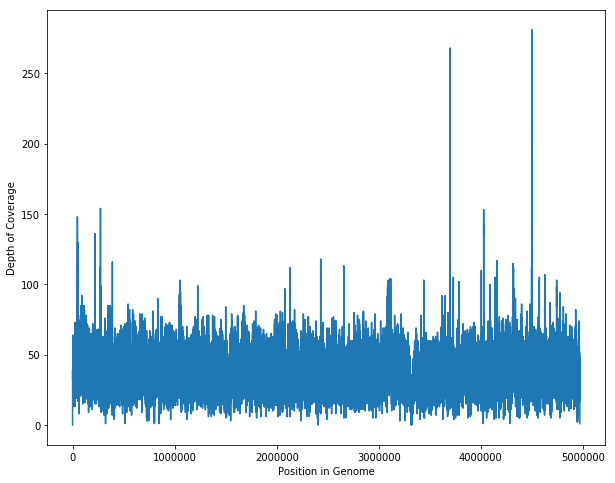

In [227]:
# plot
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['savefig.dpi'] = 200 
plt.plot(position, depth)
plt.xlabel('Position in Genome')
plt.ylabel('Depth of Coverage')
plt.show()

Using the same data, we generated a coverage histogram.

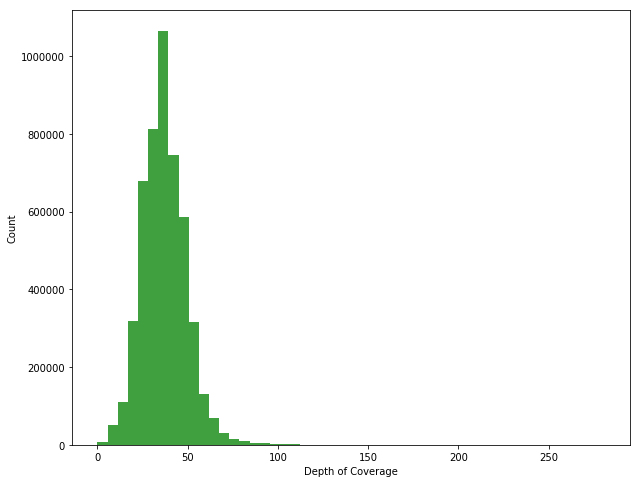

In [228]:
# plot histogram
n, bins, patches = plt.hist(depth, 50, facecolor='g', alpha=0.75)
plt.xlabel('Depth of Coverage')
plt.ylabel('Count')
plt.show()

## Extra Credit 1:

Generate the same two plots using the SAM file you produced aligning the reads to the human reference genome. Instead of using “Position in Genome” (the plot on the left in red, above), plot the average depth (total depth / length of chromosome) for each human chromosome: chr1-22, X, and Y. What biological sex is Jamie?

In [229]:
# read in the output_human.tab depth file
infile = open("lab6/output_human.tab", "r")
position, depth1 = [], []
totalDepth, length = {}, {}
for line in infile.readlines():
    line = line[:-1]
    lineList = line.split("\t")
    position.append(int(lineList[1]))
    depth1.append(int(lineList[2]))
    if len(lineList[0]) <= 5:
        totalDepth[lineList[0]] = totalDepth.get(lineList[0], 0) + int(lineList[2])
        length[lineList[0]] = length.get(lineList[0], 0) + 1
infile.close()

# print the total depth of each chromosome
print("Total depth of each chromosome")
print(totalDepth)
# print the length in the tab file of each chromosome
print("Length of each chromosome")
print(length)

Total depth of each chromosome
{'chr1': 2272919, 'chr2': 2408597, 'chr3': 1967583, 'chr4': 1894437, 'chr5': 1796144, 'chr6': 1693304, 'chr7': 1567929, 'chr8': 1443026, 'chr9': 1206697, 'chr10': 1323874, 'chr11': 1325997, 'chr12': 1316961, 'chr13': 967370, 'chr14': 890866, 'chr15': 825516, 'chr16': 797118, 'chr17': 787341, 'chr18': 754875, 'chr19': 560775, 'chr20': 599238, 'chr21': 350957, 'chr22': 352372, 'chrX': 1508460, 'chrY': 244489}
Length of each chromosome
{'chr1': 2272970, 'chr2': 2408692, 'chr3': 1967638, 'chr4': 1894494, 'chr5': 1796203, 'chr6': 1693345, 'chr7': 1567931, 'chr8': 1443077, 'chr9': 1206747, 'chr10': 1323935, 'chr11': 1326046, 'chr12': 1316943, 'chr13': 967398, 'chr14': 890894, 'chr15': 825475, 'chr16': 797024, 'chr17': 787358, 'chr18': 754949, 'chr19': 560804, 'chr20': 599262, 'chr21': 350961, 'chr22': 352377, 'chrX': 1508504, 'chrY': 244099}


- Question: What biological sex is Jamie?

    Jamie is male, because there is chrY in the genome. However, normally the (length of chrX) : (length of chrY) = 3 : 1.  
    Because the our lab result show that (length of chrX) : (length of chrY) = 6.18, it is possible that Jamie has the two X chromosomes and one Y chromosome in his genome.

In [230]:
"""
# read in the output_human.sam file
infile = open("lab6/output_human.sam", "r")
length = {}
for i in range(85):
    lineStr = infile.readline()
    ind = lineStr.find("LN:")
    if ind >= 0:
        chrmLength = int(lineStr[ind+3:-1])
        chrm = lineStr[lineStr.find("SN:")+3:ind-1]
        length[chrm] = chrmLength
infile.close()
"""

'\n# read in the output_human.sam file\ninfile = open("lab6/output_human.sam", "r")\nlength = {}\nfor i in range(85):\n    lineStr = infile.readline()\n    ind = lineStr.find("LN:")\n    if ind >= 0:\n        chrmLength = int(lineStr[ind+3:-1])\n        chrm = lineStr[lineStr.find("SN:")+3:ind-1]\n        length[chrm] = chrmLength\ninfile.close()\n'

Plot the average depth (total depth / length of chromosome) for each human chromosome: chr1-22, X, and Y.

{'chr1': 0.9999775623963361, 'chr2': 0.9999605595069855, 'chr3': 0.9999720477038968, 'chr4': 0.9999699128104919, 'chr5': 0.9999671529331595, 'chr6': 0.9999757875683928, 'chr7': 0.9999987244336644, 'chr8': 0.9999646588504979, 'chr9': 0.9999585662943434, 'chr10': 0.9999539252304682, 'chr11': 0.9999630480390574, 'chr12': 1.0000136680175225, 'chr13': 0.9999710563801042, 'chr14': 0.999968570896201, 'chr15': 1.000049668372755, 'chr16': 1.0001179387320833, 'chr17': 0.9999784088051433, 'chr18': 0.9999019801337574, 'chr19': 0.9999482885286125, 'chr20': 0.9999599507394095, 'chr21': 0.9999886027222398, 'chr22': 0.99998581065166, 'chrX': 0.9999708320296135, 'chrY': 1.001597712403574}


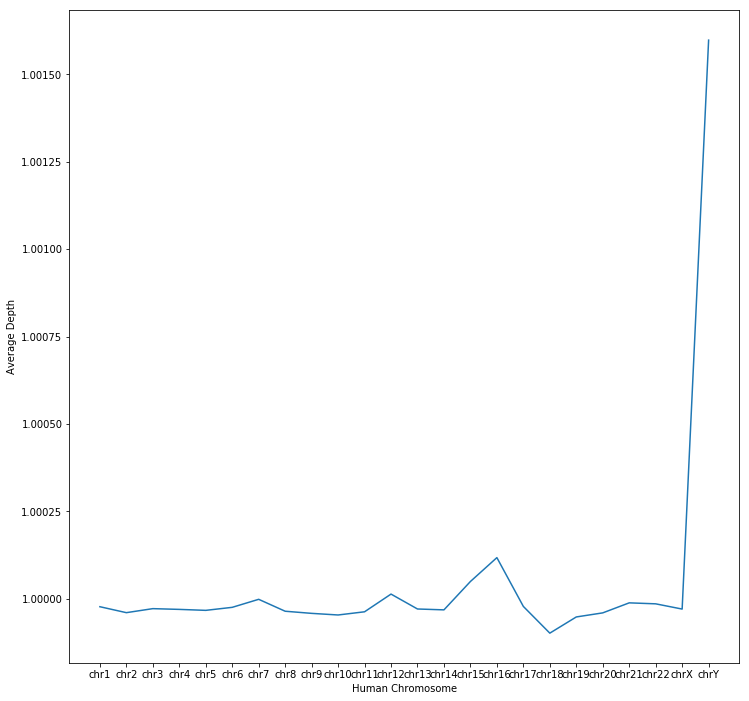

In [231]:
# compute the average length of each chromosome
aveDepth = {}
for key in totalDepth.keys():
    aveDepth[key] = totalDepth.get(key) / length.get(key)
print(aveDepth)

# plot the average depth for each human chromosome
index = list(range(1, len(aveDepth)+1))
plt.rcParams['figure.figsize'] = (12.0, 12.0)
plt.rcParams['savefig.dpi'] = 200 
plt.xticks(index, aveDepth.keys())
plt.plot(index, aveDepth.values())
plt.xlabel("Human Chromosome")
plt.ylabel("Average Depth")
plt.show()

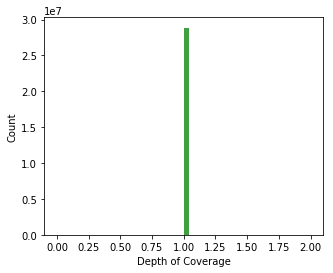

In [235]:
# plot histogram
plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['savefig.dpi'] = 200 
n, bins, patches = plt.hist(depth1, 50, facecolor='g', alpha=0.75)
plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.rcParams['savefig.dpi'] = 100
plt.xlabel('Depth of Coverage')
plt.ylabel('Count')
plt.show()

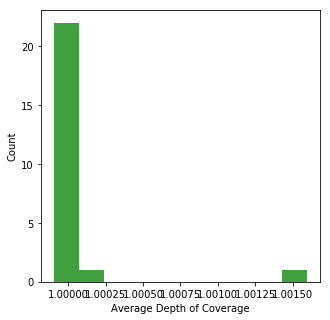

In [236]:
# plot histogram
listAveDepth = [i for i in aveDepth.values()]
n, bins, patches = plt.hist(listAveDepth, facecolor='g', alpha=0.75)
plt.xlabel('Average Depth of Coverage')
plt.ylabel('Count')
plt.show()

## Extra Credit 2: 

Try to “zoom in” on regions that seem to have higher coverage than average.
Can you figure out what genes are in those regions? You’ll have to extract the sequence from those regions and BLAST it.

First we will compute the average depth of all the chromosomes and then compare the individual chromosome depths to the average. If the individual chromosome depth is greater than average then we will append that into a list (called greaterthanavg). 

In [237]:
# compute the average depth of all chromosomes
sumDepth, sumLength = 0, 0
for key in totalDepth.keys():
    sumDepth += totalDepth.get(key)
    sumLength += length.get(key)
totalAve = sumDepth / sumLength
# print the total average
print("average depth of all chromosomes is {}".format(totalAve))
print("Here we get the ceiling of the total average, so the average is {}".format(math.ceil(totalAve)))

average depth of all chromosomes is 0.9999902623705493
Here we get the ceiling of the total average, so the average is 1


In [238]:
# create a list to store the position greater than average depth
greaterthanavg = []

# get the position of gene which has a depth greater than average depth
for i in range(len(depth1)):
    if depth1[i] > math.ceil(totalAve):
        greaterthanavg.append(position[i])

# create the start and end lists to store the start and end position of each gene at the greaterthanavg list
start, end = [0], []
for i in range(1, len(greaterthanavg)):
    if abs(greaterthanavg[i] - greaterthanavg[i-1]) > 1:
        start.append(i)
        end.append(i-1)
end.append(len(greaterthanavg)-1)

# create a list to store the start position of each gene
greaterThanAvgPos = []
for i in range(len(start)):
    greaterThanAvgPos.append(greaterthanavg[start[i]])
print(greaterThanAvgPos)

[84306892, 45285619, 30510261, 34688969, 33097974, 18485047, 27170225]


Once we have sorted by average depth, we extract the positions of the genes of interest. Then we will read into the human genome file to store the information of the genes of interest.

In [239]:
# read in the output_human.sam file
infile = open("lab6/output_human.sam", "r")

# create a result list to store the corresponding information of the target gene
res = []
for line in infile.readlines():
    for i in greaterThanAvgPos:
        if str(i) in line:
            print(line)
            res.append(line)

read77943	16	chrY	18485047	1	300M	*	0	0	TTGTAAACTCTTACAATGAACTCATAAAGTTAGAACAAAGTTAAAAATAATTGCTATCTAAGTATCAGAGTTAGAATAAATTATTCCCAAGGTTTCCCCTCACTTTAAGTTTCCCTGATTCTTGTATTTTTTACTTAAATTGGATATACAATTACTATTTTTTCATTATTTAATTCATAATACATTTGGTAAAATAATTTCTTTTTAAGTAAAACATTTAATAGTGCAGTTTGGTTCGTGTTAATTATACTTCAACGAACCCCTTATGTTACTTGCCTAGTGACAGAGTATGTGGGTAAA	BGFGFB5=>@GFFFG'GFFGEAFFGCF4=>FFFG1D@<BD7@4E?F0DCGEGFFGGC7>:>CDG-GFGGAGGGGGEGGFB=FEGFFGFGCGEEFGEGFFGG?FFBCGAGGGEEGGGAGGDGDG@?GD/EGFGF-<:FDFGG46G9GFFAFFGFGGGFGGCGE&FGFGFGGGEGG>DFG(EEGGGFEGG:DFGGGFGGGFG:GGGGGFGFBEGAFCCFFGGFEGGGGGGGGGG7AEFEGFFGCGGG;GGGGDFFFEG:GGEEFFGGEGGGGDGEC<FGAGCGG6GFGBD4EGGGGCGGGFG	AS:i:-5	XS:i:-5	XN:i:0	XM:i:1	XO:i:0	XG:i:0	NM:i:1	MD:Z:154T145	YT:Z:UU

read334190	16	chr15	30510261	1	300M	*	0	0	TGCCTTTTTGTAACTTAATCTCAGAAGTGACATCTGCTGTGTTCTGTATGTTAGAAGTGAGTCACTAAGTCCAGCTGAAACTCAGGGGAGGGCTTGCCTACCAGGAGGCAGGAATCACCAGGACCCATCAGAGACACCGTCTACCCCAGTCTGTGCTCGGGTCCTTCATGTCTCTCCCTCCTGAAATTTGATAGATTCTGCAAAAGAAAAAGCCTTGATCCACGCTGCTTTCTAGAATGTTGT

The sequences above are regions that have higher coverage than average. We BLAST them now.

```
read77943	16	chrY	18485047	1	300M	*	0	0	TTGTAAACTCTTACAATGAACTCATAAAGTTAGAACAAAGTTAAAAATAATTGCTATCTAAGTATCAGAGTTAGAATAAATTATTCCCAAGGTTTCCCCTCACTTTAAGTTTCCCTGATTCTTGTATTTTTTACTTAAATTGGATATACAATTACTATTTTTTCATTATTTAATTCATAATACATTTGGTAAAATAATTTCTTTTTAAGTAAAACATTTAATAGTGCAGTTTGGTTCGTGTTAATTATACTTCAACGAACCCCTTATGTTACTTGCCTAGTGACAGAGTATGTGGGTAAA
```
BLAST result:

Select seq AC011749.2	Homo sapiens BAC clone RP11-455E3 from Y, complete sequence

---

```
read334190	16	chr15	30510261	1	300M	*	0	0	TGCCTTTTTGTAACTTAATCTCAGAAGTGACATCTGCTGTGTTCTGTATGTTAGAAGTGAGTCACTAAGTCCAGCTGAAACTCAGGGGAGGGCTTGCCTACCAGGAGGCAGGAATCACCAGGACCCATCAGAGACACCGTCTACCCCAGTCTGTGCTCGGGTCCTTCATGTCTCTCCCTCCTGAAATTTGATAGATTCTGCAAAAGAAAAAGCCTTGATCCACGCTGCTTTCTAGAATGTTGTAGTGAAAAGCAAGTCAGTGTGGTACATTCAGAGTAATTTTATAATTTTATAATTTAA	86FG9FDGGF@GFBCAECFFEC61E=GGCED&)GGGGGDC:DE=4EG=GGGG>@9FGGDEG6FEGGFD@A;FDCCGEEFFGFGGAGGGGF.FCEBE5FFFBB>=GGFGD>G2GBE:8FF4GGGAGGE/6GGGGGE4/C'GGGG?DFBFGD5G4EGGFGEGFGGFGBCGGFGGCFGFFFDGFEGFGGDG@FG1GD;GFEGA:C+EGFFGGG?CGGGGFGGGG=FFGGGCGBCF,G@45<8BFFG<GGFG?@GDGFDGGDFGGGFGG2GDEGGFFGGGF8GFGGGGGE;GBGFFGGGGGGGG	AS:i:0	XS:i:0	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:300	YT:Z:UU
```
BLAST result:

Homo sapiens BAC clone CH17-311D18 from chromosome 15, complete sequence

---

```
read507912	16	chrY	27170225	1	300M	*	0	0	ATGTCCTGTTTTTACGTGTGACAGTTGGCTGCAACCATGTGGGATGATGACAGTTATTTCTGTCAGCTGGGTTTGCATACAGGACTCACAATTTCACCTGTGTGCTGAGTGCTACATTGGTTCTGCTTGTATAACCCAAAGACTCTATAAAAGTATGTGTCAATGTTGTAATCTTTTGTGATGTTTGTACAAGAATGTGATCCATGATATCACACATGTCCCTACACCTAGTTATAAGAGCCTAAATATTCTCTATTTGCTGAGTTCACATCTAAGAGTCGTTATCATTCCTGCGAGCCT	F@FB73FF0F6DB;F9GG<D:EDEG>09@-F5F<FA@BD:EDAFFFA9GGD<FGD*E>DF7FC,EGGGGD4GFFFGGF=AGGGFGGGFFFGFGF@3DBFGGGF;FFFFGFGFGGFG+0B8FGGFC5?BEGGGGGG?GCG>DFGFEFEGGGD7GBGFBFGCGDD08GGGEGFFBCGGGGGFBDCGGDFGFDGGGGGGFGGGGGGCFF/GGGGGGFGGFGGCAGGGEF=CDGEFGGGDCFGGCGGDFFEFFGGGFBGCDFGGGGG+3GCG>D*GGGF>GGGG>GGGCEFDE?CFGGGGGGFG	AS:i:0	XS:i:0	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:300	YT:Z:UU
```

BLAST result:

Homo sapiens chromosome Y palindromes P1, P2, P3 and inverted repeat IR2 (P1-P2-P3-IR2@) on chromosome Y

---

```
read515325	0	chr12	45285619	42	300M	*	0	0	AATTGGGTAGAATATGGTTCCATCCCCTGCCTTGAGAGGATCTCAGAACAATATGTTTTGCTAATTATGCAAATATATTTATCAACTGTATGAGTAAAGTAGCCTATAATTTAAAGACTGAGGACTTGTTTTCAAACACATCACAGTAATGAAATGAGCCTATTCCAACAGTATATTCATGGTGCTATGGTTTCCTTTCTAAGCATGGTGATTGTTTCACACTGGGCAAGACATCTGGTGAAGTTGAGAGGCTGTCACCCAGCTGAGAGAATATGTGCATGGTTGGGAGTAGAATTTCCT	CCCCCGGGGGGGGGGGGFGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGFGGGGGGGGGGGGGGFGFFGGGGFGFGGGGGGFGGAGGGEGEGGGGGGGGGGGGGGGGGGFGGGGGGGGGGGGGGGGGGGGFFBEFGGEFFFFAECEAFFEEA@:C@D9C@9@C@EEFFEG9>FC;=EB=DEFFFGGF7C,8,8EEEC777@DFCA:8@666B,6@D6@6D@E9@=EE@E,@;,@5@,+;A7C?CG<F>7C?5?*+33;F8CDF99:EDCDCE59;0?4=8===FFFC	AS:i:-3	XN:i:0	XM:i:1	XO:i:0	XG:i:0	NM:i:1	MD:Z:204C95	YT:Z:UU
```
BLAST result:

Homo sapiens 12 BAC RP11-453L7 (Roswell Park Cancer Institute Human BAC Library) complete sequence

---

```
read781959	16	chr16	33097974	1	300M	*	0	0	AGGTCAAACGAAACACCTAACATTGCTAGGGCAGCCTCCCACAACAAAGAATCCTCTGGTCCTAAAGGTAAGTAGCACCAAGATTGAGAAACCATAATCTAGACAGGAAACACTACGTAGCTATTCCAAGTGCGCAGGAAAGCACATCAGTGCCCTCGAGGGGAAAAGTGTAAACATTTTAATTGCTGTACATGGTGACACAAATCCATGTTGTTAATCTAAGTGGAAGGGGCTGAAGCACAAAACATAATTCAAAGAGTTTACTTGAGCCACAATGAGGACAGCTGCCTGGAAGAAACA	0@GEE)DGF.AEFFD57FD%EG=GGF@==DFGGG5AF??FA0GGEGFDD<BCGEE<59FGGGGGGGF-GFBGB<GAGGGEGBGF?DGGGCGADEFCFEGDFGGG3G;(FFFFFCCCBGGGF:EGEFECE@EFDD>FGGGF5GGGFBGGGFEEGG7GEF;FGGFGG4GGG4EDGGGGC<FFFGGGGGGEECD@7GGDGGGGFEG<GFGG<EGECAGG;GGFEGFD8-GG@FGGEG>GGB>CCGGGE<CFEGACDGFGGBGGG6:GEGEGGFFFDGGGE@GGGFGGG4@@FF.EGGGGAE>&	AS:i:-5	XS:i:-5	XN:i:0	XM:i:1	XO:i:0	XG:i:0	NM:i:1	MD:Z:141A158	YT:Z:UU
```

BLAST result:

Homo sapiens chromosome 16 clone RP11-19N8, complete sequence

---

```
read854980	0	chr7	84306892	42	300M	*	0	0	TTGTGCTTTGGCAACATTTGTTGTTGTTTGTGAATCACAGCTATGTTCAGTGGTATGTGACTTGCCTCTCGGCACCCAGGAGGCATCAGCAAAAACACCTGTGGCCCAATAAACCACAATTTTTGGGTCCAGTAAATTGGTCAATACACAGCCCACACCAAAATATCACTGAATTTGGCTTTGTATATTTGGTCATTTGATAACCATTCTGCAAAACTGACCCAATTTTTACTGGTTAAAGAACAATATTGCAGGAAAGTAGAGGCAGACAGCTTTTTAAGTCCTTTAAAATGATACAAC	GGGEFGGGGGGGC7GGDFFGGFFGDEFFF?GGGEGG>GBGFFGBEGEDGG6GFFGGGGGGCGG>FGCGFGBEGG=BG@GEGFFGFGGF?@CGGGGGGEGGGGGGEFFFEG?'GGFGGEFFFFFFFFGC;FGDGEGFEF?DFGGGGFGGGGG17GGGGDGGGGG6GEGGGGGDGGGGGEG8GEG<GGFDFGGGG7EAFG@DGFEGGF6GDFFFEEGB<D6GE@GA9GGFGAE?G>EF@DGG:4$C>:GGG>F=/?GGFGFG*A97GGGGEBGGGC@FG;9%FDFCBG;24@EF45GF/=+.	AS:i:0	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:300	YT:Z:UU
```

BLAST result:

Homo sapiens BAC clone RP11-750F10 from 7, complete sequence

---

```
read1019002	0	chr15	34688969	1	300M	*	0	0	TATTTTAGACCTCATTCTGATCTCCCTCTCCCCGCCAACCCCACCAACTTCTGCCCTGTCATTTATCCTCATATCTCTCTGTGTAACATATTGACTTACTTTTTGGAGATAATGGTCTAACCAATTAATCCTTTCTTCTGGTGTCTAATCCATCCACTCGGTTTCTTATTTCAACAATTCCATTTTATATTTCCTTATTTCATTTTATTCTGAGACAGAGTCTCACTCTGTCACCCAGGCTGGACTGTAGTGGCACGAACCTGCAGCCCTGGCCTCCTGGGCTCAAGTGATCCTCCCACC	CFEGFGFGGAFF?CGGEFB4D3CGGGGGCF;GCBFFGG984EEFGEFGGGGGGGCFF>G1&BFG?0G,4G2@@GFFFGFGGEDGFGEGGG:'BEGGGG/GGGF;CFDGGE=GGFGGFGE==GGGGGGGGG:2GGGGFGFGGGGGG6GGGCEG??GFB/A9FGGGGEGFGFDFG51DGEG5GGGFGFGGFDFE(GGBFGGCGFEE(3G<CGACBA;-DE>;FEGGGGE::GFEDFDFFG>F@CGC:@DE@:FEGGEDE5EGGFFGG6(GEFDDFCD?FAFG;FBCG891>?EEE:DF)6GG	AS:i:-2	XS:i:-2	XN:i:0	XM:i:1	XO:i:0	XG:i:0	NM:i:1	MD:Z:91G208	YT:Z:UU

```

BLAST result:

Select seq AC277885.1	Homo sapiens chromosome 15 clone CH17-113G17, complete sequence

---